In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
import yfinance as yf

In [3]:
np.random.seed(10)

In [4]:
initial_amount = 1000
gain_pct = 0.5
loss_pct = 0.4
leverage = 0.25

# num of time steps
t_N = 60

# num of people
p_N = 100000

In [5]:
%%time

evt_data = {}
gain_data = {}

# generate data for every person
for i in range(p_N):
    # start with initial amount as leverage
    person_gain = initial_amount
    
    # generate random events of gain / loss for N time steps
    evts = np.random.randint(0,2, t_N)
    
    # temp state store for interim gains
    gains = []
    
    # calc gain progression
    for e in evts:
        if e == 0:
            person_gain = (person_gain * (1 - leverage)) + (person_gain * leverage * (1 - loss_pct))
        else:
            person_gain = (person_gain * (1 - leverage)) + (person_gain * leverage * (1 + gain_pct))
        
        gains.append(person_gain)

#         print(person_gain, e)
        
    # append gain data - events, gain progression, to a dictionary
    evt_data[f"p_evt_{i+1}"] = evts
    gain_data[f"p_gain_{i+1}"] = gains

CPU times: user 6.66 s, sys: 160 ms, total: 6.82 s
Wall time: 6.92 s


In [6]:
# df_evt = pd.DataFrame(evt_data)
df_gain = pd.DataFrame(gain_data)

In [7]:
df_gain.head()

,p_gain_1,p_gain_2,p_gain_3,p_gain_4,p_gain_5,p_gain_6,p_gain_7,p_gain_8,p_gain_9,p_gain_10,...,p_gain_99991,p_gain_99992,p_gain_99993,p_gain_99994,p_gain_99995,p_gain_99996,p_gain_99997,p_gain_99998,p_gain_99999,p_gain_100000
0,1125.000000,1125.000000,1125.000000,900.0000,900.00,900.0000,1125.000000,1125.000000,1125.000000,900.0000,...,900.000000,1125.000000,1125.000000,900.000000,1125.000000,900.000000,1125.000000,900.00,1125.000000,900.0000
1,1265.625000,1012.500000,1265.625000,810.0000,810.00,810.0000,1265.625000,1265.625000,1012.500000,810.0000,...,1012.500000,1265.625000,1012.500000,810.000000,1012.500000,810.000000,1265.625000,810.00,1012.500000,810.0000
2,1139.062500,911.250000,1423.828125,729.0000,729.00,729.0000,1423.828125,1139.062500,1139.062500,911.2500,...,911.250000,1139.062500,911.250000,911.250000,1139.062500,911.250000,1423.828125,729.00,1139.062500,911.2500
3,1281.445312,1025.156250,1281.445312,820.1250,656.10,656.1000,1601.806641,1281.445312,1025.156250,820.1250,...,820.125000,1025.156250,1025.156250,820.125000,1025.156250,820.125000,1281.445312,656.10,1281.445312,820.1250
4,1153.300781,922.640625,1441.625977,738.1125,590.49,738.1125,1441.625977,1441.625977,1153.300781,738.1125,...,922.640625,922.640625,922.640625,922.640625,1153.300781,922.640625,1153.300781,590.49,1153.300781,738.1125


In [8]:
df_gain.iloc[-1].agg(["mean", "median", "min", "max"])

mean       2098.642645
median     1451.613360
min          40.859284
max       51571.666404
Name: 59, dtype: float64

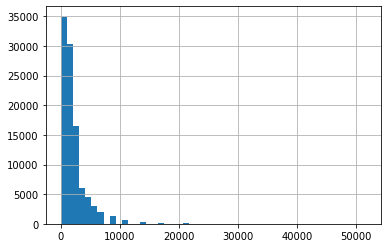

In [9]:
df_gain.iloc[-1].hist(bins=50)

In [10]:
df_ens = pd.DataFrame()
df_ens["ens_avg"] = df_gain.apply(np.mean, axis=1)
df_ens["ens_med"] = df_gain.apply(np.median, axis=1)

In [11]:
df_ens.head()

,ens_avg,ens_med
0,1012.430250,900.000000
1,1025.284838,1012.500000
2,1037.983916,1139.062500
3,1050.776724,1025.156250
4,1064.194843,922.640625


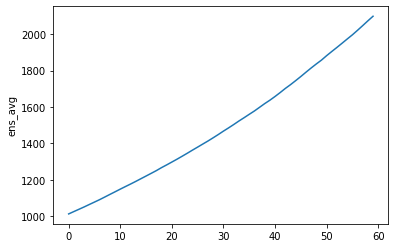

In [12]:
sns.lineplot(x=df_ens.index, y=df_ens["ens_avg"], )

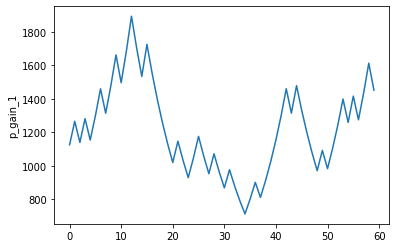

In [13]:
sns.lineplot(x=df_gain.index, y=df_gain["p_gain_1"])

## Ensemble Average for leverage = 0.25

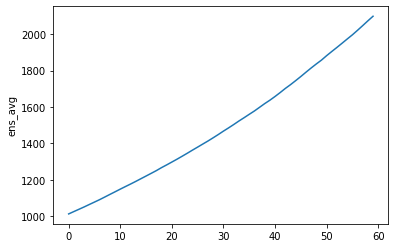

In [14]:
sns.lineplot(x=df_ens.index, y=df_ens["ens_avg"], )

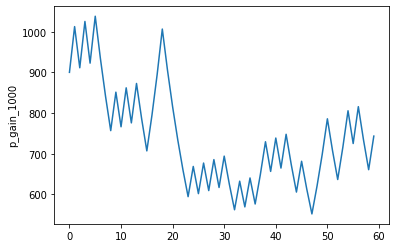

In [15]:
sns.lineplot(x=df_gain.index, y=df_gain["p_gain_1000"])

### Download Stock Prices

In [16]:
# Tesla, Shell, Google, Shopify, American Airlines, Nasdaq 100 index, Dow Jones Index

stocks_list = ['TSLA', 'XOM', 'GOOGL', 'SHOP', 'AAL', 'NDX', 'DJI']

In [17]:
%%time

stocks_price_df = yf.download(stocks_list, 
                      start='2000-01-01', 
                      end='2020-05-22', 
                      actions=True,
                      rounding=True,
                      progress=False)

CPU times: user 729 ms, sys: 69.2 ms, total: 799 ms
Wall time: 4.49 s


**Quick sanity check** - head and tail of the dataframe

In [18]:
stocks_price_df.head()

Adj Close                                     Close                 \
                 AAL      DJI GOOGL NDX SHOP TSLA    XOM   AAL      DJI GOOGL   
Date                                                                            
1999-12-31       NaN  11497.1   NaN NaN  NaN  NaN  22.45   NaN  11497.1   NaN   
2000-01-03       NaN  11357.5   NaN NaN  NaN  NaN  21.82   NaN  11357.5   NaN   
2000-01-04       NaN  10997.9   NaN NaN  NaN  NaN  21.40   NaN  10997.9   NaN   
2000-01-05       NaN  11122.7   NaN NaN  NaN  NaN  22.57   NaN  11122.7   NaN   
2000-01-06       NaN  11253.3   NaN NaN  NaN  NaN  23.73   NaN  11253.3   NaN   

            ... Stock Splits           Volume                           \
            ...         SHOP TSLA  XOM    AAL  DJI GOOGL NDX SHOP TSLA   
Date        ...                                                          
1999-12-31  ...          NaN  NaN  0.0    NaN  0.0   NaN NaN  NaN  NaN   
2000-01-03  ...          NaN  NaN  0.0    NaN  0.0   NaN NaN  NaN  NaN   
2000-01-04  ...          NaN  NaN  0.0    NaN  0.0   NaN NaN  NaN  NaN   
2000-01-05  ...          NaN  NaN  0.0    NaN  0.0   NaN NaN  NaN  NaN   
2000-01-06  ...          NaN  NaN  0.0    NaN  0.0   NaN NaN  NaN  NaN   

                      
                 XOM  
Date                  
1999-12-31   2758600  
2000-01-03  13458200  
2000-01-04  14510800  
2000-01-05  17485000  
2000-01-06  19461600  

[5 rows x 56 columns]

In [19]:
stocks_price_df.tail()

Adj Close                                                   Close  \
                 AAL      DJI    GOOGL      NDX    SHOP    TSLA    XOM   AAL   
Date                                                                           
2020-05-15      9.04  23685.4  1373.06  9152.64  767.00  799.17  42.00  9.04   
2020-05-18      9.87  24597.4  1385.18  9331.93  738.02  813.63  45.34  9.87   
2020-05-19      9.64  24206.9  1374.40  9298.54  753.01  808.01  43.94  9.64   
2020-05-20      9.87  24575.9  1409.16  9485.02  778.00  815.56  45.37  9.87   
2020-05-21      9.89  24474.1  1406.75  9377.99  802.35  827.60  44.56  9.89   

                              ... Stock Splits                Volume       \
                DJI    GOOGL  ...         SHOP TSLA  XOM         AAL  DJI   
Date                          ...                                           
2020-05-15  23685.4  1373.06  ...          0.0  0.0  0.0  39560500.0  0.0   
2020-05-18  24597.4  1385.18  ...          0.0  0.0  0.0  76624400.0  0.0   
2020-05-19  24206.9  1374.40  ...          0.0  0.0  0.0  62242500.0  0.0   
2020-05-20  24575.9  1409.16  ...          0.0  0.0  0.0  44006700.0  0.0   
2020-05-21  24474.1  1406.75  ...          0.0  0.0  0.0  45785700.0  0.0   

                                                             
                GOOGL  NDX       SHOP        TSLA       XOM  
Date                                                         
2020-05-15  2077200.0  0.0  3023500.0  10518400.0  22445600  
2020-05-18  2356400.0  0.0  3675100.0  11698100.0  32046100  
2020-05-19  1579300.0  0.0  5264400.0   9636500.0  21771600  
2020-05-20  1913100.0  0.0  3239000.0   7309300.0  19352400  
2020-05-21  1544700.0  0.0  4136500.0  12254600.0  19130700  

[5 rows x 56 columns]

**Finding from when all the stocks have data**

In [20]:
date_to_check = "2015-12-31"

In [21]:
stocks_price_df[stocks_price_df.index > date_to_check].head()

Adj Close                                                  Close  \
                 AAL      DJI   GOOGL      NDX   SHOP    TSLA    XOM    AAL   
Date                                                                          
2016-01-04     39.10  17148.9  759.44  4497.86  25.72  223.41  63.87  40.91   
2016-01-05     38.72  17158.7  761.53  4484.18  25.31  223.43  64.41  40.52   
2016-01-06     39.40  16906.5  759.33  4443.98  25.30  219.04  63.88  41.23   
2016-01-07     38.66  16514.1  741.00  4305.72  24.67  215.65  62.86  40.45   
2016-01-08     38.58  16346.5  730.91  4270.78  24.93  211.00  61.59  40.37   

                             ... Stock Splits                Volume  \
                DJI   GOOGL  ...         SHOP TSLA  XOM         AAL   
Date                         ...                                      
2016-01-04  17148.9  759.44  ...          0.0  0.0  0.0  12037200.0   
2016-01-05  17158.7  761.53  ...          0.0  0.0  0.0  10514200.0   
2016-01-06  16906.5  759.33  ...          0.0  0.0  0.0  12393800.0   
2016-01-07  16514.1  741.00  ...          0.0  0.0  0.0  11312900.0   
2016-01-08  16346.5  730.91  ...          0.0  0.0  0.0   8853100.0   

                                                                        
                    DJI      GOOGL  NDX      SHOP       TSLA       XOM  
Date                                                                    
2016-01-04  101064033.0  3369100.0  0.0  601800.0  6827100.0  20400100  
2016-01-05   81431354.0  2260800.0  0.0  418200.0  3186800.0  11993500  
2016-01-06   90438059.0  2410300.0  0.0  256600.0  3779100.0  18826900  
2016-01-07  121717423.0  3156600.0  0.0  416000.0  3554300.0  21263800  
2016-01-08  103150551.0  2375300.0  0.0  137400.0  3628100.0  19033600  

[5 rows x 56 columns]

**Subsetting data from the selected date**

In [22]:
stock_analyze_df = stocks_price_df[stocks_price_df.index > date_to_check].iloc[:,:7].copy()

**Dropping multi-level column names**

In [23]:
stock_analyze_df.columns = stock_analyze_df.columns.droplevel()

In [24]:
stock_analyze_df.head()

,AAL,DJI,GOOGL,NDX,SHOP,TSLA,XOM
Date,,,,,,,
2016-01-04,39.10,17148.9,759.44,4497.86,25.72,223.41,63.87
2016-01-05,38.72,17158.7,761.53,4484.18,25.31,223.43,64.41
2016-01-06,39.40,16906.5,759.33,4443.98,25.30,219.04,63.88
2016-01-07,38.66,16514.1,741.00,4305.72,24.67,215.65,62.86
2016-01-08,38.58,16346.5,730.91,4270.78,24.93,211.00,61.59


**Checking for missing values**

In [25]:
stock_analyze_df.isna().sum()

AAL        0
DJI      150
GOOGL      0
NDX      222
SHOP       0
TSLA       0
XOM        0
dtype: int64

**Filling missing values with previous observed value**

In [26]:
stock_analyze_df.fillna(method="ffill", inplace=True)

**Computing % change from previous value**

In [27]:
stock_analyze_pc_df = stock_analyze_df.apply(lambda x: (x - x.shift(1))/x.shift(1))

In [28]:
stock_analyze_pc_df.head()

,AAL,DJI,GOOGL,NDX,SHOP,TSLA,XOM
Date,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,-0.009719,0.000571,0.002752,-0.003041,-0.015941,0.000090,0.008455
2016-01-06,0.017562,-0.014698,-0.002889,-0.008965,-0.000395,-0.019648,-0.008229
2016-01-07,-0.018782,-0.023210,-0.024140,-0.031112,-0.024901,-0.015477,-0.015967
2016-01-08,-0.002069,-0.010149,-0.013617,-0.008115,0.010539,-0.021563,-0.020204


**Plotting stock price and % change**

In [29]:
stock_ticker = "AAL"

/Users/bargava/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


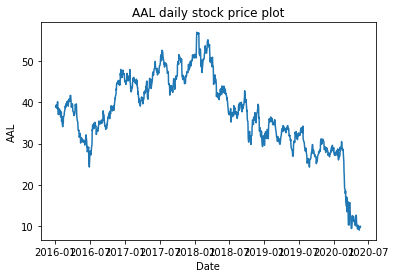

In [30]:
sns.lineplot(x=stock_analyze_df.index, y=stock_analyze_df[stock_ticker]).set_title(stock_ticker+" daily stock price plot");

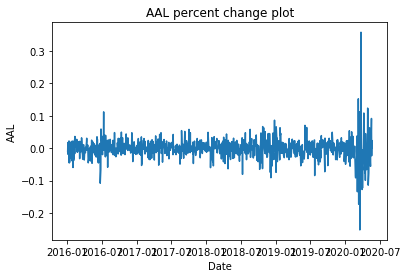

In [31]:
sns.lineplot(x=stock_analyze_pc_df.index, y=stock_analyze_pc_df[stock_ticker]).set_title(stock_ticker+" percent change plot");

In [32]:
# Reorder stock_analyze_pc_df columns
stocks_list_reordered = ['AAL', 'XOM', 'TSLA', 'GOOGL', 'SHOP', 'DJI', 'NDX']
stock_analyze_pc_df = stock_analyze_pc_df[stocks_list_reordered]

In [33]:
stock_analyze_pc_df.head(2)

,AAL,XOM,TSLA,GOOGL,SHOP,DJI,NDX
Date,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,-0.009719,0.008455,0.00009,0.002752,-0.015941,0.000571,-0.003041


**Scenario construction**

- Person A: Invests in AAL  
- Person B: Invests in XOM  
- Person C: Invests in TSLA  
- Person D: Invests in GOOGL  
- Person E: Invests in SHOP  
- Person F: Invests in DJI  
- Person G: Invests in NDX  

F & G have invested in an index. This is equivalent to an ensemble average.

Let's see how the investment turns out for them - given they start with $1000

In [34]:
initial_amount = 1000
leverage = 1

# num of people
p_N = len(stocks_list)

In [35]:
%%time

evt_data = {}
gain_data = {}

# generate data for every person
for i in range(p_N):
    # start with initial amount as leverage
    person_gain = initial_amount
    
    # generate random events of gain / loss for N time steps
    evts = stock_analyze_pc_df.iloc[1:,i]
    
    # temp state store for interim gains. Initialize it with the starting amount
    gains = [person_gain]
    
    # calc gain progression
    for e in evts:
        person_gain = (person_gain * (1 - leverage)) + (person_gain * leverage * (1 + e))
        gains.append(person_gain)

        
    # append gain data - events, gain progression, to a dictionary
    evt_data[f"p_evt_{i+1}"] = evts
    gain_data[f"p_gain_{i+1}"] = gains

CPU times: user 172 ms, sys: 52.1 ms, total: 224 ms
Wall time: 234 ms


In [36]:
stock_gain_df = pd.DataFrame(gain_data)

In [37]:
stock_gain_df.columns = ["person "+ x for x in stocks_list_reordered]

In [38]:
stock_gain_df.head()

,person AAL,person XOM,person TSLA,person GOOGL,person SHOP,person DJI,person NDX
0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
1,990.281330,1008.454674,1000.089522,1002.752028,984.059098,1000.571465,996.958554
2,1007.672634,1000.156568,980.439551,999.855156,983.670295,985.864983,988.020970
3,988.746803,984.186629,965.265655,975.718951,959.175739,962.983048,957.281907
4,986.700767,964.302489,944.451905,962.432845,969.284603,953.209827,949.513769


In [39]:
stock_gain_df.tail()

,person AAL,person XOM,person TSLA,person GOOGL,person SHOP,person DJI,person NDX
1099,231.202046,657.585721,3577.145159,1807.990098,29821.150855,1381.161474,2034.887702
1100,252.429668,709.879443,3641.869209,1823.949226,28694.401244,1434.342728,2074.748881
1101,246.547315,687.959919,3616.713665,1809.754556,29277.216174,1411.571588,2067.325350
1102,252.429668,710.349147,3650.508035,1855.525124,30248.833593,1433.089003,2108.785067
1103,252.941176,697.667136,3704.399982,1852.351733,31195.567652,1427.152762,2084.989306


In [40]:
stock_gain_df.iloc[-1].agg(["mean", "median", "min", "max"])

mean       5887.867107
median     1852.351733
min         252.941176
max       31195.567652
Name: 1103, dtype: float64

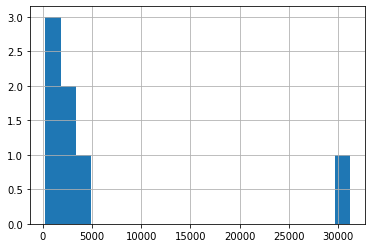

In [41]:
stock_gain_df.iloc[-1].hist(bins=20)

In [42]:
df_ens = pd.DataFrame()
df_ens["ens_avg"] = stock_gain_df.apply(np.mean, axis=1)
df_ens["ens_med"] = stock_gain_df.apply(np.median, axis=1)

In [43]:
df_ens.head()

,ens_avg,ens_med
0,1000.000000,1000.000000
1,997.595239,1000.089522
2,992.240022,988.020970
3,970.479819,965.265655
4,961.413744,962.432845


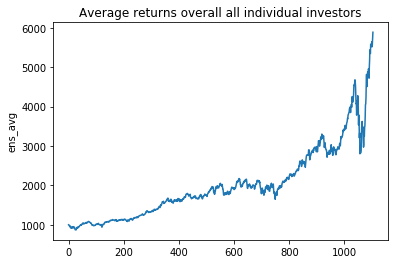

In [44]:
sns.lineplot(x=df_ens.index, y=df_ens["ens_avg"], ).set_title("Average returns overall all individual investors");

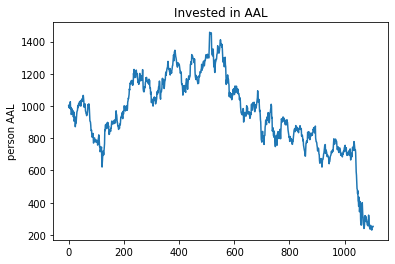

In [45]:
sns.lineplot(x=stock_gain_df.index, y=stock_gain_df.iloc[:,0]).set_title("Invested in " + stocks_list_reordered[0]);

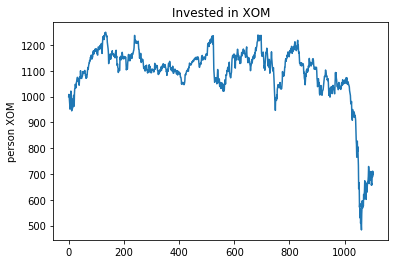

In [46]:
sns.lineplot(x=stock_gain_df.index, y=stock_gain_df.iloc[:,1]).set_title("Invested in " + stocks_list_reordered[1]);

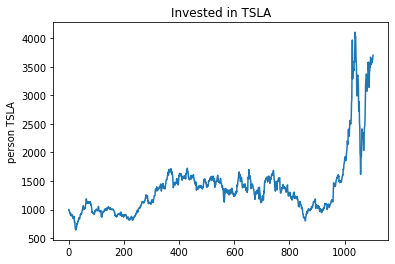

In [47]:
sns.lineplot(x=stock_gain_df.index, y=stock_gain_df.iloc[:,2]).set_title("Invested in " + stocks_list_reordered[2]);

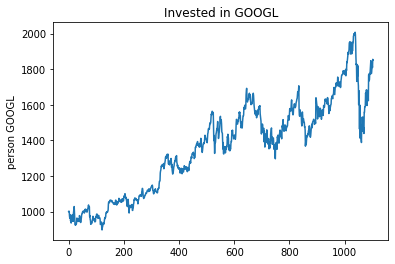

In [48]:
sns.lineplot(x=stock_gain_df.index, y=stock_gain_df.iloc[:,3]).set_title("Invested in " + stocks_list_reordered[3]);

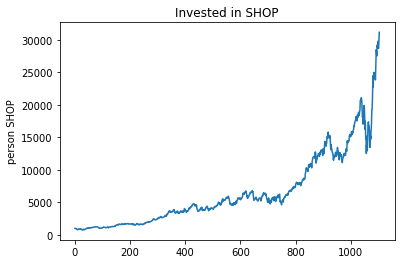

In [49]:
sns.lineplot(x=stock_gain_df.index, y=stock_gain_df.iloc[:,4]).set_title("Invested in " + stocks_list_reordered[4]);

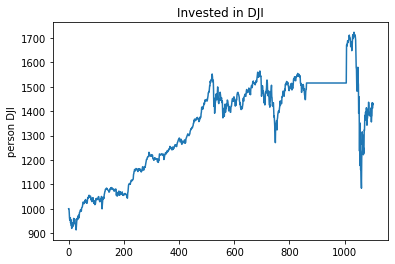

In [50]:
sns.lineplot(x=stock_gain_df.index, y=stock_gain_df.iloc[:,5]).set_title("Invested in " + stocks_list_reordered[5]);

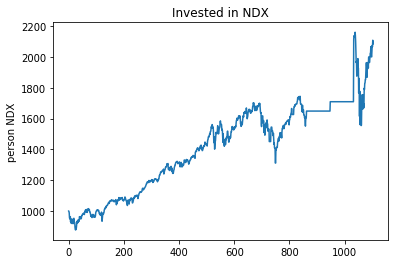

In [51]:
sns.lineplot(x=stock_gain_df.index, y=stock_gain_df.iloc[:,6]).set_title("Invested in " + stocks_list_reordered[6]);